# Importing libraries required for classifier

In [1]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset from feature extraction

In [2]:
features_dataset = "features.csv"

In [3]:
features_df = pd.read_csv(features_dataset)
features_df.head(21)

,Accent Label,Speaker Label,Gender (M/F),Word,Vowel Phoneme,Class Number,Formant 1 (Hz),Formant 2 (Hz),Formant 3 (Hz)
0,brm_001,ajh001,M,had,AE,1,808.037273,1466.260490,2531.229722
1,brm_001,ajh001,M,hood,UH,2,394.653365,1079.159276,2990.346629
2,brm_001,ajh001,M,hid,IH,3,347.427995,2370.195627,2964.605459
3,brm_001,ars001,M,had,AE,1,723.971229,1602.030134,2541.530978
4,brm_001,ars001,M,hood,UH,2,457.037333,866.364766,2366.222933
5,brm_001,ars001,M,hid,IH,3,436.568043,1902.591752,2632.313765
6,brm_001,ikp001,M,had,AE,1,796.669010,1589.599745,2668.503205
7,brm_001,ikp001,M,hood,UH,2,887.156121,2427.341030,3812.209973
8,brm_001,ikp001,M,hid,IH,3,293.462894,2332.984854,3073.964171
9,brm_001,jxs001,M,had,AE,1,897.253552,1421.573699,2409.385194


## Getting the columns for training and testing the kNN classifier

In [4]:
X = features_df[['Formant 1 (Hz)', 'Formant 2 (Hz)', 'Formant 3 (Hz)']]
y = features_df['Vowel Phoneme']

In [5]:
# Separate data by gender
male_data = features_df[features_df['Gender (M/F)'] == 'M']
female_data = features_df[features_df['Gender (M/F)'] == 'F']

In [6]:
# Define a function to split data
def split_data(data, features, labels, test_size, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

### The ratio for splitting data is set to [3:1], meaning that 75% of the data is used for training while the other 25% is used for testing

In [7]:
# Split male data
X_train_male, X_test_male, y_train_male, y_test_male = split_data(male_data, X, y, 0.25)

# Split female data
X_train_female, X_test_female, y_train_female, y_test_female = split_data(female_data, X, y, 0.25)

# Combine the splits
X_train = pd.concat([X_train_male, X_train_female])
X_test = pd.concat([X_test_male, X_test_female])
y_train = pd.concat([y_train_male, y_train_female])
y_test = pd.concat([y_test_male, y_test_female])

In [8]:
# Initialize k-NN classifier
k = 5  # You can choose a different value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k, metric="euclidean")

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [9]:
# Extract the unique phoneme labels
phoneme_labels = features_df['Vowel Phoneme'].unique()

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = phoneme_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[32  0  0]
 [ 0 22  0]
 [ 0  0 22]]


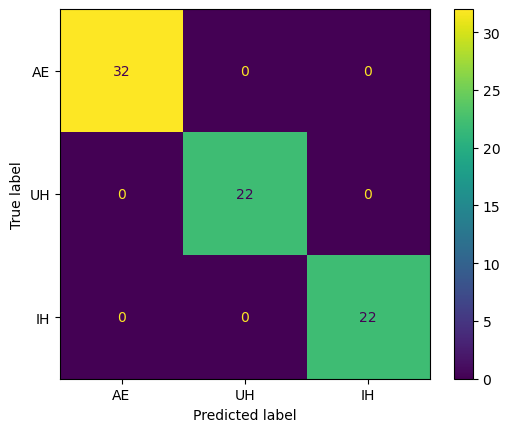

In [10]:
cm_display.plot()
plt.show()

In [11]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 1.0


## Testing performance with different values of k.

In [12]:
ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
f1_scores = {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[k] = f1

#print("F1 Scores for different k values:", f1_scores)

# Convert dictionary to DataFrame
f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1-Score'])

# Reset index to turn the index into a column
f1_df.reset_index(inplace=True)

# Rename the columns
f1_df.columns = ['K', 'F1-Score']

# Display the DataFrame
display(f1_df)

,K,F1-Score
0,1,0.947368
1,3,0.947368
2,5,1.000000
3,7,1.000000
4,9,1.000000
5,11,1.000000
6,13,0.945708
7,15,0.945708
8,17,0.973630
9,19,0.973630


## Testing different distance metrics

In [13]:
metrics = ['euclidean', 'manhattan', 'cosine']
metric_scores = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    metric_scores[metric] = f1

#print("F1 Scores for different metrics:", metric_scores)

# Convert dictionary to DataFrame
met_df = pd.DataFrame.from_dict(metric_scores, orient='index', columns=['F1-Score'])

# Reset index to turn the index into a column
met_df.reset_index(inplace=True)

# Rename the columns
met_df.columns = ['Distance Metric', 'F1-Score']

# Display the DataFrame
display(met_df)

,Distance Metric,F1-Score
0,euclidean,1.000000
1,manhattan,0.945708
2,cosine,0.919969


## Evaluating performance of data of single gender, instead of both genders combined.
## The same parameters (k=5 + Euclidean distance metric) are used in this case for consistency.

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_male, y_train_male)
y_pred_male = knn.predict(X_test_male)
f1_male = f1_score(y_test_male, y_pred_male, average='weighted')

print("Male F1 Score:", f1_male)

Male F1 Score: 1.0


In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_female, y_train_female)
y_pred_female = knn.predict(X_test_female)
f1_female = f1_score(y_test_female, y_pred_female, average='weighted')

print("Female F1 Score:", f1_female)

Female F1 Score: 1.0


## Checking the vowel-based phoneme pairs that produce the most confusion.

In [16]:
# Extract the unique phoneme labels
phoneme_labels = features_df['Vowel Phoneme'].unique()

# Put the confusion matrix in a DataFrame for easier analysis
conf_matrix_df = pd.DataFrame(cm, index=phoneme_labels, columns=phoneme_labels)

# Remove diagonal elements (correct predictions) by setting them to 0
np.fill_diagonal(conf_matrix_df.values, 0)

# Find the most confusing pairs
most_confused_pairs = conf_matrix_df.stack().idxmax()
most_confused_value = conf_matrix_df.stack().max()

# Printing out confusing pairs and value
if most_confused_value == 0:
    print("There are no confused pairs!")
else:
    print(f"The most confusing phonemes are {most_confused_pairs} with {most_confused_value} instances of confusion.")

There are no confused pairs!
